# Case Study: Sentiment Analysis

First stage of our competition. 

The work to be done is as follows:
1. Feature extraction and baseline
    * read the dataset and understand it
    * put it in a format so that you can use `CountVectorizer` or`Tf-IDF` to extract the desired features
    * perform on the desired dates and preprocessing
    * use one of the classifiers you know to predict the polarity of different sentences
1. My first neural network
    * reuse the features already extracted 
    * proposed a neural network built with Keras
1. Hyper-parameter fitting
    * for the base line: adjust min_df, max_df, ngram, max_features + model's hyper-parameter
    * for the neural network: adjust batch size, number of layers and number of neuron by layers, use earlystop
1. <span style="color:red">Word embedding
    * stage 1 build a network that uses Keras' embedding which is not language sensitive.
    * stage 2 build a network that simultaneously uses Keras' embedding and the features extracted in the first weeks.
    </span>

**WARNING:** the dataset is voluminous, I can only encourage you to work first on a small part of it and only at the end, when the code is well debugged and that it is necessary to build the "final model", to use the whole dataset.

## 1. Read the dataset

Could you find below a proposal. You can complete them.

In [0]:
student = True

if student:
    ''' FIX THIS '''
    path = "../dataset/"  
else:
    path = "../dataset/"

In [0]:
import pandas as pd
import numpy as np

def read(file, nb_items=5):
   with open(file, 'r') as f:
       df = pd.DataFrame({'id':[],
                          'review':[],
                          'lang':[],
                          'sentiment':[]})
       sid = []
       for line in f.readlines():
           tokens = line.strip().split('\t')
           if tokens[0]=="meta":
               if sid!=[]:
                   df.loc[len(df)] = [sid,
                                      review,
                                      lang,
                                      sentiment]
                   if nb_items!=0 and len(df)==nb_items:
                       return df
               sid = tokens[1]
               sentiment = tokens[2]
               review = []
               lang = []
           elif tokens[0]!="":
               if len(tokens)==2:
                   review += [tokens[0]]
                   lang += [tokens[1]]
       return df

read(path+"train_conll.txt", 2).head()

id                                             review  \
0   3  [@, AdilNisarButt, pakistan, ka, ghra, tauq, h...   
1  41  [Madarchod, mulle, ye, mathura, me, Nahi, dikh...   

                                                lang sentiment  
0  [O, Hin, Hin, Hin, Hin, Hin, Eng, Eng, Eng, En...  negative  
1  [Hin, Hin, Hin, Hin, Hin, Hin, Hin, Hin, Hin, ...  negative

In [0]:
from sklearn.model_selection import train_test_split

if student:
    ''' You could read the whole dataset - spend a lot of time '''
    df_train = read(path+"train_conll.txt", 4000)
    ''' You can adjust valid part '''
    df_train, df_valid = train_test_split(df_train, test_size=0.5)
else:
    df_train = read(path+"train_conll.txt", 0)
    df_train, df_valid = train_test_split(df_train, test_size=0.1)
    df_test = read(path+"trial_conll.txt", 0)

In [0]:
''' Define X '''

X_train = df_train['review']
X_valid = df_valid['review']
if not student:
    X_test = df_test['review']

X_train.shape, X_valid.shape

((2000,), (2000,))

In [0]:
''' Define y '''

y_train = df_train['sentiment']
y_valid = df_valid['sentiment']
if not student:
    y_test = df_test['sentiment']

y_train.shape, y_valid.shape

((2000,), (2000,))

In [0]:
''' If necessary, encode the label '''
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_valid_enc = encoder.transform(y_valid)
if not student:
    y_test_enc = encoder.transform(y_test)

nb_classes = len(np.unique(y_train_enc))
nb_classes

3

## 2. Text normalisation

It's your job

In [0]:
''' Put your code here '''

# you can put all the text in lower case
# you can remove all english stop word
# you can remove all/some punctuation sign
# you can remove all number
# you can stem/lemitize the english word
# ...

' Put your code here '

## 3. Feature extraction

Could you find below a proposal. You can complete them.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary=True)
''' learn about the parameter of CountVectorizer '''
# analyzer
# ngram_range
# max_df and min_df
# max_features
# binary
# ...

X_train_enc = cv.fit_transform(X_train.apply(' '.join)).toarray()
X_valid_enc = cv.transform(X_valid.apply(' '.join)).toarray()
if not student:
    X_test_enc = cv.transform(X_test.apply(' '.join)).toarray()

## 4. Word embedding with Keras

In [0]:
from keras.preprocessing.text import Tokenizer

FILTERS='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
VOCABULARY_SIZE = 4_000 # Max size of the vocabulary in review

# create the tokenizer
tokenizer = Tokenizer(num_words=VOCABULARY_SIZE,
              filters=FILTERS,
              lower=True,
              split=' ',
              oov_token="_UNK_")

# fit the tokenizer on the documents
tokenizer.fit_on_texts(X_train)

# encode documents
X_train_enc2 = tokenizer.texts_to_sequences(X_train)
X_valid_enc2 = tokenizer.texts_to_sequences(X_valid)
if not student:
    X_test_enc2 = tokenizer.texts_to_sequences(X_test)
X_train_enc2[0]

[18,
 2,
 3488,
 34,
 789,
 695,
 80,
 52,
 371,
 1468,
 13,
 2081,
 614,
 790,
 2082,
 3,
 3489,
 3490,
 2082,
 3491,
 428,
 29,
 3492,
 2083,
 19,
 3493,
 372,
 34,
 29,
 2084,
 9]

In [0]:
from keras.preprocessing.sequence import pad_sequences

SEQUENCE_SIZE = 24     # Nombre de mots dans une review
PADDING_MODE = 'pre'
PADDING_VALUE = 0
TRUNCATING_MODE='post'

X_train_enc2 = pad_sequences(X_train_enc2,
                            maxlen=SEQUENCE_SIZE,
                            padding=PADDING_MODE,
                            truncating=TRUNCATING_MODE,
                            value=PADDING_VALUE)
X_valid_enc2 = pad_sequences(X_valid_enc2,
                            maxlen=SEQUENCE_SIZE,
                            padding=PADDING_MODE,
                            truncating=TRUNCATING_MODE,
                            value=PADDING_VALUE)
if not student:
    X_test_enc2 = pad_sequences(X_test_enc2,
                            maxlen=SEQUENCE_SIZE,
                            padding=PADDING_MODE,
                            truncating=TRUNCATING_MODE,
                            value=PADDING_VALUE)
X_train_enc2[0]

array([  18,    2, 3488,   34,  789,  695,   80,   52,  371, 1468,   13,
       2081,  614,  790, 2082,    3, 3489, 3490, 2082, 3491,  428,   29,
       3492, 2083], dtype=int32)

## 5. Build neural network

Could you find below a proposal. You can complete them.

In [0]:
import keras
from keras.models import Model
from keras.layers import Input, Dense, Embedding, Flatten, LSTM
from keras import utils

EMBEDDING_SIZE = 50

# This returns a tensor
inputs = Input(shape=(SEQUENCE_SIZE,))

# Word embedding
embedding = Embedding(VOCABULARY_SIZE,
                      EMBEDDING_SIZE,
                      input_length=SEQUENCE_SIZE)(inputs)

# a layer instance is callable on a tensor, and returns a tensor
output_1 = Dense(16, activation='relu', return_sequences=False)(embedding)
output_2 = Dense(8, activation='relu')(output_1)
predictions = Dense(nb_classes, activation='softmax')(output_2)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

utils.print_summary(model)

TypeError: ('Keyword argument not understood:', 'return_sequences')

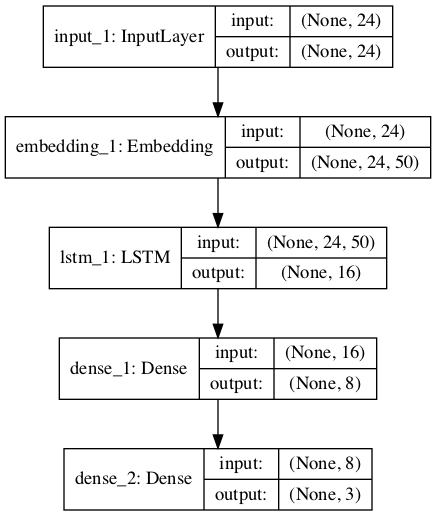

In [0]:
from IPython.display import Image
from keras.utils import plot_model


plot_model(model, show_shapes=True, show_layer_names=True, to_file='model2.png')
Image(retina=False, filename='model2.png')

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', patience=15, verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history = model.fit(X_train_enc2, y_train_enc, epochs=500, validation_data=[X_valid_enc2, y_valid_enc], callbacks=[es, mc])
model.save("model.h5")

Train on 2000 samples, validate on 2000 samples
Epoch 1/500
2000/2000 [==============================] - 1s 592us/step - loss: 0.7438 - accuracy: 0.6450 - val_loss: 1.2317 - val_accuracy: 0.5180

Epoch 00001: val_accuracy improved from -inf to 0.51800, saving model to best_model.h5
Epoch 2/500
2000/2000 [==============================] - 1s 415us/step - loss: 0.7352 - accuracy: 0.6630 - val_loss: 1.0003 - val_accuracy: 0.5375

Epoch 00002: val_accuracy improved from 0.51800 to 0.53750, saving model to best_model.h5
Epoch 3/500
2000/2000 [==============================] - 1s 398us/step - loss: 0.7433 - accuracy: 0.6455 - val_loss: 0.9406 - val_accuracy: 0.5385

Epoch 00003: val_accuracy improved from 0.53750 to 0.53850, saving model to best_model.h5
Epoch 4/500
2000/2000 [==============================] - 1s 395us/step - loss: 0.7077 - accuracy: 0.6825 - val_loss: 1.1840 - val_accuracy: 0.3825

Epoch 00004: val_accuracy did not improve from 0.53850
Epoch 5/500
2000/2000 [===============

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


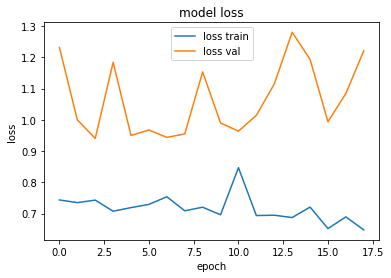

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot history
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss train', 'loss val'], loc='best')
plt.show()

## 6. Evaluate

In [0]:
from sklearn.metrics import precision_recall_fscore_support
from keras.models import load_model
 
# load model
model = load_model('model.h5')
y_pred_enc = model.predict(X_valid_enc2)
y_pred_enc = np.argmax(y_pred_enc, axis=1)


precision, recall, fscore, support = precision_recall_fscore_support(y_valid_enc, y_pred_enc, average='weighted')
print("="*20, "validation set")
print("* P:", precision)
print("* R:", recall)
print("* F:", fscore)

if not student:
    y_pred_enc = model.predict(X_test_enc2)
    y_pred_enc = np.argmax(y_pred_enc, axis=1)
    precision, recall, fscore, support = precision_recall_fscore_support(y_test_enc, y_pred_enc, average='weighted')
    print("="*20, "test set")
    print("* P:", precision)
    print("* R:", recall)
    print("* F:", fscore)

==================== validation set
* P: 0.5622221982454364
* R: 0.5365
* F: 0.5415025882716329


## My score

**2000 items for training / 2000 items for validation**

* Logistic regression with BinaryVect without preprocessing
    * F: 0.558
* MLP [16, 8, 3] - 100 epochs with BinaryVect, without lemmatization
    * F: 0.561
* MLP [16, 8, 3] with early stopping without preprocessing
    * F: 0.569
* MLP [16, 8, 3] with lines=24, Keras embedding, early stopping without preprocessing
    * F: 0.541